In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_miceID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop duplicate mouse ID from dataframe
duplicate_miceids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_data = merge_df[merge_df['Mouse ID'].isin(duplicate_miceids)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_data.groupby('Mouse ID').count())


248

In [9]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_summ_df = clean_data.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = stats_summ_df['Tumor Volume (mm3)'].mean()
tumor_median = stats_summ_df['Tumor Volume (mm3)'].median()
tumor_var = stats_summ_df['Tumor Volume (mm3)'].var()
tumor_stdev = stats_summ_df['Tumor Volume (mm3)'].std()
tumor_sem = stats_summ_df['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_grp_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Var':tumor_var,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grp_df


,Mean,Median,Var,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summ = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


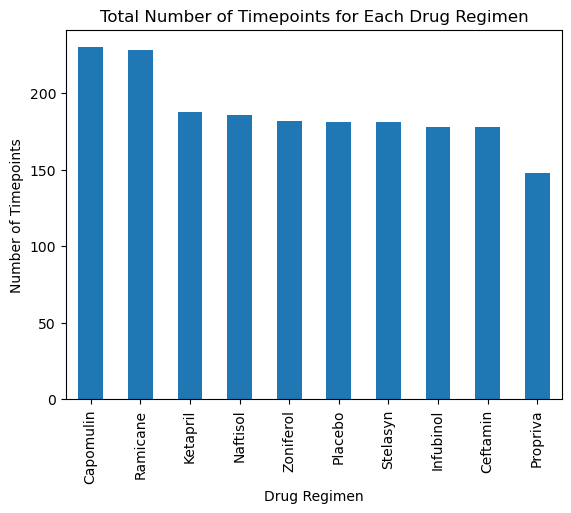

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of timepoints for all mice tested for each drug regimen
total_timepoints = clean_data['Drug Regimen'].value_counts()

# Create the first bar chart using Pandas
ax = total_timepoints.plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen')

# Label the axes
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Timepoints')

plt.show()


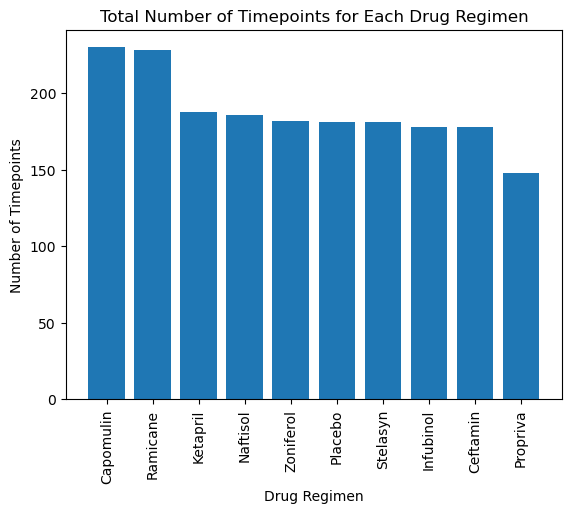

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(total_timepoints.index, total_timepoints.values)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()

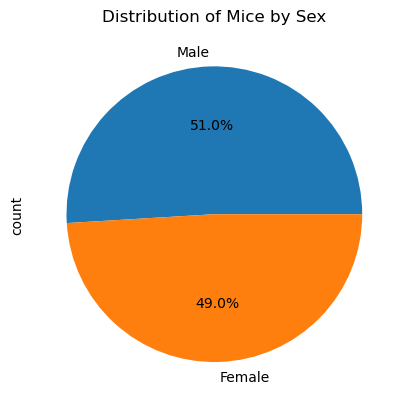

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data['Sex'].value_counts()
pie_plot = sex_data.plot.pie(autopct="%1.1f%%", title='Distribution of Mice by Sex')


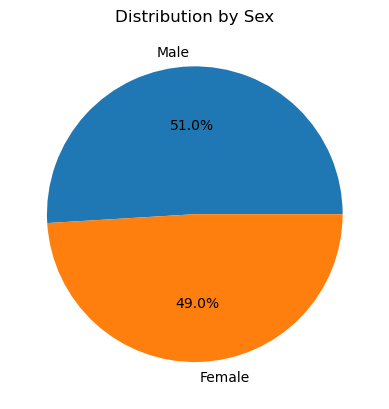

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_data['Sex'].value_counts()
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%")
plt.title('Distribution by Sex')
plt.show()

In [32]:
#Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timept = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timept_merge = pd.merge(max_timept, clean_data, on=['Mouse ID','Timepoint'], how='left')


In [41]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each drug in the treatment list
for treatment in treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    final_tumor_volume = max_timept_merge.loc[max_timept_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_data.append(final_tumor_volume)

# Calculate the IQR and determine if there are any potential outliers
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    # Print the results
    print(f"{treatment} Regimen")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if not outliers.empty:
        print(f"Potential outliers: {outliers.values}")
    else:
        print("No potential outliers found.")
    print("\n")


Capomulin Regimen
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No potential outliers found.


Ramicane Regimen
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No potential outliers found.


Infubinol Regimen
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Potential outliers: [36.3213458]


Ceftamin Regimen
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No potential outliers found.




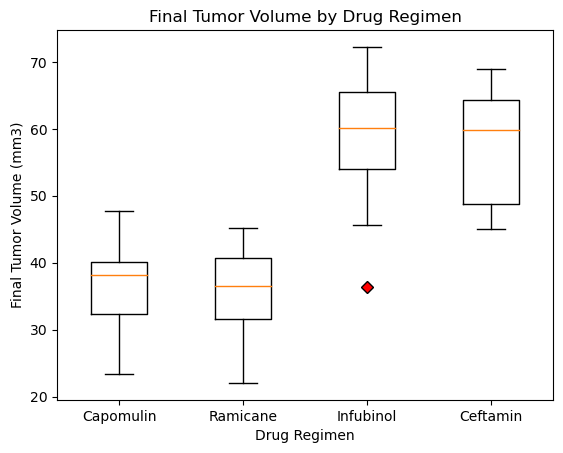

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ***NOTE*** must run previous cells in order for this cell to work

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


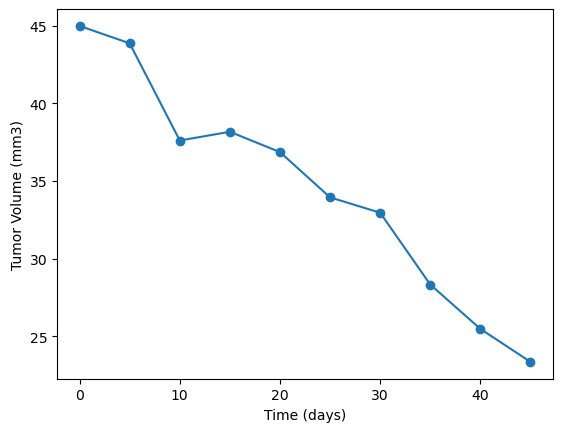

In [45]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = clean_data.loc[clean_data['Mouse ID'] == 's185']
mouse

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


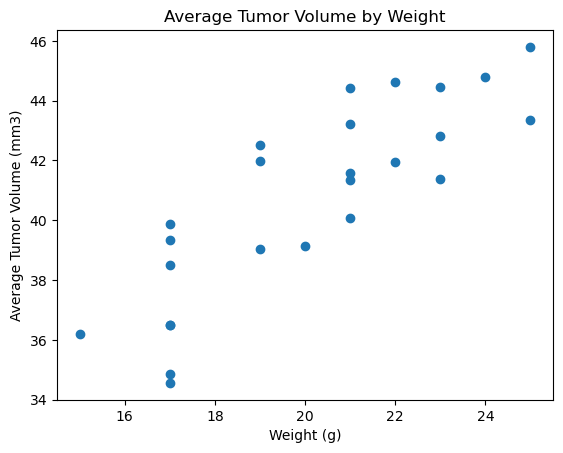

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


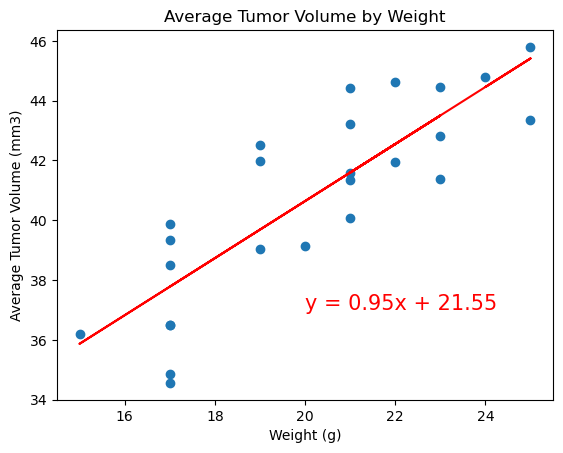

In [39]:
#Correlation and Regression
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()